# BDF Demo
##### Import pyNastran

In [1]:
import os
import pyNastran
print (pyNastran.__file__)
print (pyNastran.__version__)
pkg_path = pyNastran.__path__[0]

from pyNastran.bdf.bdf import BDF, read_bdf
from pyNastran.utils import object_attributes, object_methods

print("pkg_path = %s" % pkg_path)

f:\work\pynastran\pynastran\master3\pyNastran\__init__.pyc
0.8.0+dev.4f504cf
pkg_path = f:\work\pynastran\pynastran\master3\pyNastran


### Let's load the  iSat model into the pyNastranGUI

it's a .dat file, so instead of:

```
>>> pyNastranGUI -i bdf_filename
```
we need to include the format:

```
>>> pyNastranGUI -f nastran -i bdf_filename
```

Alternatively, we could load the model and the results, but in this demo we're just showing off the geometry.  To do that instead:

```
>>> pyNastranGUI -f nastran -i bdf_filename -o op2_filename
```

In [2]:
bdf_filename = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'iSat', 'ISat_Launch_Sm_Rgd.dat'))
print(bdf_filename)

# look at the model
!pyNastranGUI -f nastran -i {bdf_filename} > junk.out

f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat


QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread


## Loading a BDF
There are two ways to load a BDF; the long way or the short way.

The short way instantiates the ```BDF``` class and the short way uses the ```read_bdf``` function.
As this demo was written for the Jupyter Notebook, we'll use read_bdf and then mention the other method.  The class-based method allows finer control over things like:
 - what cards should be loaded
 - OpenMDAO dynamic syntax support

### The Class-based method

In [3]:
print(bdf_filename)

# create the BDF object
bdf = BDF()

# read the file from the GUI
# don't cross-reference
bdf.read_bdf(bdf_filename, xref=False)

f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat
DEBUG:     fname=bdf.pyc                   lineNo=723    ---starting BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---
DEBUG:     fname=bdf.pyc                   lineNo=2658   opening 'f:\\work\\pynastran\\pynastran\\master3\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'
DEBUG:     fname=bdf.pyc                   lineNo=749    ---finished BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---


### The function-based method

In [4]:
bdf = read_bdf(bdf_filename, xref=False)

DEBUG:     fname=bdf.pyc                   lineNo=723    ---starting BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---
DEBUG:     fname=bdf.pyc                   lineNo=2658   opening 'f:\\work\\pynastran\\pynastran\\master3\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'
DEBUG:     fname=bdf.pyc                   lineNo=749    ---finished BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---


For simplicity of using the demo, we'll again use the ```read_bdf``` method

In [5]:
#bdf_filename = r'D:\work\pynastran_0.8.0_py27\models\iSat\ISat_Launch_Sm_Rgd.dat'
bdf_filename = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'iSat', 'ISat_Launch_Sm_Rgd.dat'))

# read the file as a path
bdf_xref = read_bdf(bdf_filename, xref=True)

DEBUG:     fname=bdf.pyc                   lineNo=723    ---starting BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---
DEBUG:     fname=bdf.pyc                   lineNo=2658   opening 'f:\\work\\pynastran\\pynastran\\master3\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'
DEBUG:     fname=cross_reference.pyc       lineNo=527    Cross Referencing...
DEBUG:     fname=bdf.pyc                   lineNo=749    ---finished BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---


### Interrogating the BDF object

IDE's like WingIDE, PyCharm, Spyder and "Python Tools for Visual Studio" make it very easy to program with their object introspection ability.  Unfortunately, because pyNastran has so many functions, it can be difficult to learn the code.

Some handy object introspection methods were created that will work on all pyNastran objects and even non-pyNastran objects.  By convention, private data members/functions start with an underscore _, and public ones do not.

We can use the generic object attributes/methods functions

In [6]:
print(object_attributes(bdf))
print(object_methods(bdf))

<code object __object_attr at 0000000004469130, file "f:\work\pynastran\pynastran\master3\pyNastran\utils\__init__.py", line 133>
<code object object_attributes at 0000000004469330, file "f:\work\pynastran\pynastran\master3\pyNastran\utils\__init__.py", line 188>
<code object <module> at 0000000003ED55B0, file "<ipython-input-6-c78a1dd495b4>", line 1>
<code object __object_attr at 0000000004469130, file "f:\work\pynastran\pynastran\master3\pyNastran\utils\__init__.py", line 133>
<code object object_attributes at 0000000004469330, file "f:\work\pynastran\pynastran\master3\pyNastran\utils\__init__.py", line 188>
<code object <module> at 0000000003ED55B0, file "<ipython-input-6-c78a1dd495b4>", line 1>
<code object __object_attr at 0000000004469130, file "f:\work\pynastran\pynastran\master3\pyNastran\utils\__init__.py", line 133>
<code object object_attributes at 0000000004469330, file "f:\work\pynastran\pynastran\master3\pyNastran\utils\__init__.py", line 188>
<code object <module> at 000

Alternatively, we can just use access these functions from pyNastran directly

In [7]:
print("attributes = [%s]\n" % ', '.join(bdf.object_attributes()))
print("methods = [%s]\n" % ', '.join(bdf.object_methods()))

attributes = [MATS1, MATS3, MATS8, MATT1, MATT2, MATT3, MATT4, MATT5, MATT8, MATT9, active_filename, active_filenames, aecomps, aefacts, aelinks, aelists, aeparams, aero, aeros, aestats, aesurfs, asets, bcrparas, bcs, bctadds, bctparas, bctsets, bdf_filename, bsets, bsurf, bsurfs, cMethods, caeros, card_count, cards_to_read, case_control_deck, case_control_lines, convection_properties, coords, creep_materials, csets, csschds, dareas, dconadds, dconstrs, ddvals, debug, delays, dequations, desvars, dlinks, dload_entries, dloads, dmigs, dmijis, dmijs, dmiks, dmis, doptprm, dphases, dresps, dscreen, dtable, dumplines, dvcrels, dvmrels, dvprels, echo, elements, epoints, executive_control_lines, flfacts, flutters, frequencies, gridSet, gusts, hyperelastic_materials, iSolLine, include_dir, is_msc, is_nx, loads, masses, materials, methods, mkaeros, monitor_points, mpcadds, mpcs, nastran_format, nlparms, nlpcis, nodes, paeros, params, pbusht, pdampt, pelast, phbdys, plotels, points, properties,

Somme other very handy methods that will be used later by ```test_bdf```

In [8]:
print(bdf.get_bdf_stats())
print("card_count = %s\n" % bdf.card_count)
print("reject_count = %s" % bdf.reject_count)

---BDF Statistics---
SOL 103

bdf.params
  PARAM    : 8

bdf.nodes
  GRID     : 5380

bdf.elements
  CBAR     : 827
  CBUSH    : 104
  CHEXA    : 25
  CQUAD4   : 4580
  CTRIA3   : 32

bdf.rigid_elements
  RBE2     : 44

bdf.properties
  PBAR     : 1
  PBARL    : 18
  PBUSH    : 2
  PSHELL   : 8
  PSOLID   : 4

bdf.materials
  MAT1     : 14
  MAT8     : 8

bdf.coords
  CORD2R   : 75

bdf.methods
  EIGRL    : 1


card_count = {u'ENDDATA': 1, u'CQUAD4': 4580, u'PSOLID': 4, u'PARAM': 8, u'PBUSH': 2, u'CBUSH': 104, u'PBARL': 18, u'MAT1': 14, u'CTRIA3': 32, u'CORD2R': 75, u'PSHELL': 8, u'USET': 1, u'GRID': 5380, u'EIGRL': 1, u'CBAR': 827, u'PBAR': 1, u'CHEXA': 25, u'SPC': 1, u'CONM2': 15, u'RBE2': 44, u'MAT8': 8}

reject_count = {}


# Cross-referencing

Cross-referencing a BDF allows improved usability of the BDF class.  It comes with some negative side effects, but in general is a very useful thing.  It dramatically minimizes the amount of code you need to write, greatly simplifies future operations, and is highly recommended.

The major downside is it prevents decks from being saved to object files for faster loading.

### Without Cross-Referencing (xref=False)
Here the raw values of the the data objects are returned to us

In [9]:
cquad = bdf.elements[1]
print(cquad)
nid1 = cquad.nodes[0]
print("nid1 = %s" % nid1)
n1 = bdf.nodes[nid1]
cd4 = n1.cd
c4 = bdf.coords[cd4]
print("i xref=False %s" % str(c4.i))
#print object_attributes(c4)

$*
$*  ELEMENT CARDS
$*
CQUAD4         1       1       1       2       4       3

nid1 = 1
i xref=False [ 1.  0.  0.]


### Cross-Referenced (xref=True)
Here we can trace the referenced objects very easily

In [10]:
print("i xref=True %s" % bdf_xref.elements[1].nodes[0].cd.i)

i xref=True [ 1.  0.  0.]


So how is this done?

In [11]:
cquad.nodes[0] = n1
print(cquad.nodes[0])

$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4



Let's show off the GRID card

In [12]:
# some Grid methods
n1 = bdf_xref.nodes[1]
print(n1)

# the comment
c1 = bdf_xref.nodes[1].comment
c2 = bdf_xref.nodes[2].comment
print("c1=%r" % c1)
print("c2=%r" % c2)


# get the position of a node
# in the local cooordinate system
print("xyz = %s" % n1.xyz)

# in the global frame
print("position = %s" % n1.get_position())

# in an arbitrary frame
print("wrt5 = %s" % n1.get_position_wrt(bdf, 5))
print("wrt4 = %s" % n1.get_position_wrt(bdf, 4))


$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4

c1=u'$*\n$*  GRID CARDS\n$*\n'
c2=u''
xyz = [ -4.5  -7.5 -14. ]
position = [ -4.5  -7.5 -14. ]
wrt5 = [  2.12132034  14.         -26.59188309]
wrt4 = [ -4.5  -7.5 -14. ]


Now let's modify the GRID card and write it out

In [13]:
n1 = bdf_xref.nodes[1]
n1.xyz[1] = -7.5
print("repr  = %s" % n1.repr_fields())
print("raw   = %s" % n1.repr_fields())

#n1.xyz[1] = 100000000000.
print("repr2 = %s" % n1.repr_fields())
print(n1)
print(n1.write_card(size=8))
print(n1.write_card(size=16, is_double=False))
print(n1.write_card(size=16, is_double=True))

repr  = [u'GRID', 1, 4, -4.5, -7.5, -14.0, 4, u'', None]
raw   = [u'GRID', 1, 4, -4.5, -7.5, -14.0, 4, u'', None]
repr2 = [u'GRID', 1, 4, -4.5, -7.5, -14.0, 4, u'', None]
$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4

$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4                

$*
$*  GRID CARDS
$*
GRID*                  1               4            -4.5            -7.5
*                   -14.               4                                

$*
$*  GRID CARDS
$*
GRID*                  1               4-4.500000000D+00-7.500000000D+00
*       -1.400000000D+01               4                                



### Calculating the mass of the structure
You can also calcculate the mass of individual groups

In [14]:
mass, cg, I = bdf_xref.mass_properties()
print("mass = %s" % mass)

mass = 1.70202557344


### Examples of xref on elements

In [15]:
eid100 = bdf_xref.elements[100]
print(eid100)
print("nodes = %s" % eid100.nodes)
print("--node0--\n%s" % eid100.nodes[0])
print("--cd--\n%s" % eid100.nodes[0].cd)
print("cd.cid = %s" % eid100.nodes[0].cd.cid)

print("area = %s" % eid100.Area())
print("mass = %s" % eid100.Mass())
print("--pid--\n%s" % eid100.pid)
print("pid.pid = %s" % eid100.pid.pid)
print("pid.Pid() = %s" % eid100.Pid())

print(eid100.pid.mid1)
print("type = %s" % eid100.pid.mid1.type)
print("nu12 = %s" % eid100.pid.mid1.nu12)
print("mass = %s" % eid100.Mass())

CQUAD4       100       1     149     152     161     160

nodes = [GRID         149       4      3.     7.5   -16.5       4
, GRID         152       4     1.5     7.5   -16.5       4
, GRID         161       4     1.5     7.5    -14.       4
, GRID         160       4      3.     7.5    -14.       4
]
--node0--
GRID         149       4      3.     7.5   -16.5       4

--cd--
CORD2R         4              0.      0.      0.      0.      0.      1.
              1.      0.      0.

cd.cid = 4
area = 3.75
mass = 3.6428803074e-05
--pid--
$*
$*  PROPERTY CARDS
$*
$*
$*  I-DEAS property: 1  name: BUS PNL HCMB 2PLY
PSHELL         1       6    .036       61415.815       7  22.234 3.551-6
              .4     -.4

pid.pid = 1
pid.Pid() = 1
$*
$*  I-DEAS Material: 6  name: BUS_CFRP_PW_ORTHO
$* M46J PW ETW
MAT8           6   1.7+7   1.7+7     .98 340000. 180000. 180000..0001712
                           71.33

type = MAT8
nu12 = 0.98
mass = 3.6428803074e-05


### Write the modified deck
Let's first switch to the desktop to make the file easy to find

In [16]:
import getpass
name = getpass.getuser()
os.chdir(os.path.join(r'C:\Users', name, 'Desktop'))

In [17]:
pwd

u'C:\\Users\\Steve\\Desktop'

There are two ways to write a deck
 - interspersed : alternate properties and elements (similar to how Patran writes decks)
 - not-interspersed (default) : much faster
 
We can also use 8 or 16 character field width as well as double precision.

Note that double precision only works for certain cards (e.g. GRID, COORD, DMIG) and not much else.

In [18]:
bdf_xref.write_bdf('fem.bdf', interspersed=False, size=8, is_double=False)
!tail -n 5 "fem.bdf"

bdf_xref.write_bdf('fem.bdf', interspersed=True, size=16, is_double=False)
!tail "fem.bdf"

bdf_xref.write_bdf('fem.bdf', interspersed=True, size=16, is_double=True)
!tail "fem.bdf"

CORD2R        75        1.355-13-2.19-15    -40.1.355-13-2.19-15      0.
             40.-2.19-15    -40.
CORD2R        76        1.355-13-2.19-15    -40.1.355-13-2.19-15      0.
             40.-2.19-15    -40.
ENDDATA
*
CORD2R*               75                 1.3549966049-13-2.1854783949-15
*                   -40. 1.3549966049-13-2.1854783949-15              0.
*                    40.-2.1854783949-15            -40.
*
CORD2R*               76                 1.3549966049-13-2.1854783949-15
*                   -40. 1.3549966049-13-2.1854783949-15              0.
*                    40.-2.1854783949-15            -40.
*
ENDDATA
*
CORD2R*               75                1.3549966049D-13-2.185478395D-15
*       -4.000000000D+011.3549966049D-13-2.185478395D-150.0000000000D+00
*       4.0000000000D+01-2.185478395D-15-4.000000000D+01
*
CORD2R*               76                1.3549966049D-13-2.185478395D-15
*       -4.000000000D+011.3549966049D-13-2.185478395D-150.0000000000D+00
*      

In [19]:
bdf_filename

'f:\\work\\pynastran\\pynastran\\master3\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'

## pyNastranGUI

In [20]:
print(bdf_filename)
%echo {bdf_filename}
#!pyNastranGUI -f nastran -i {bdf_filename}

solid_bending_bdf = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.bdf'))
solid_bending_op2 = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.op2'))

!pyNastranGUI -f nastran -i {solid_bending_bdf} -o {solid_bending_op2}  > junk.out
print("done")

f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat
f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat
done


QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread


# We can also script the GUI!

/cygdrive/c/Users/Steve/Desktop


QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread


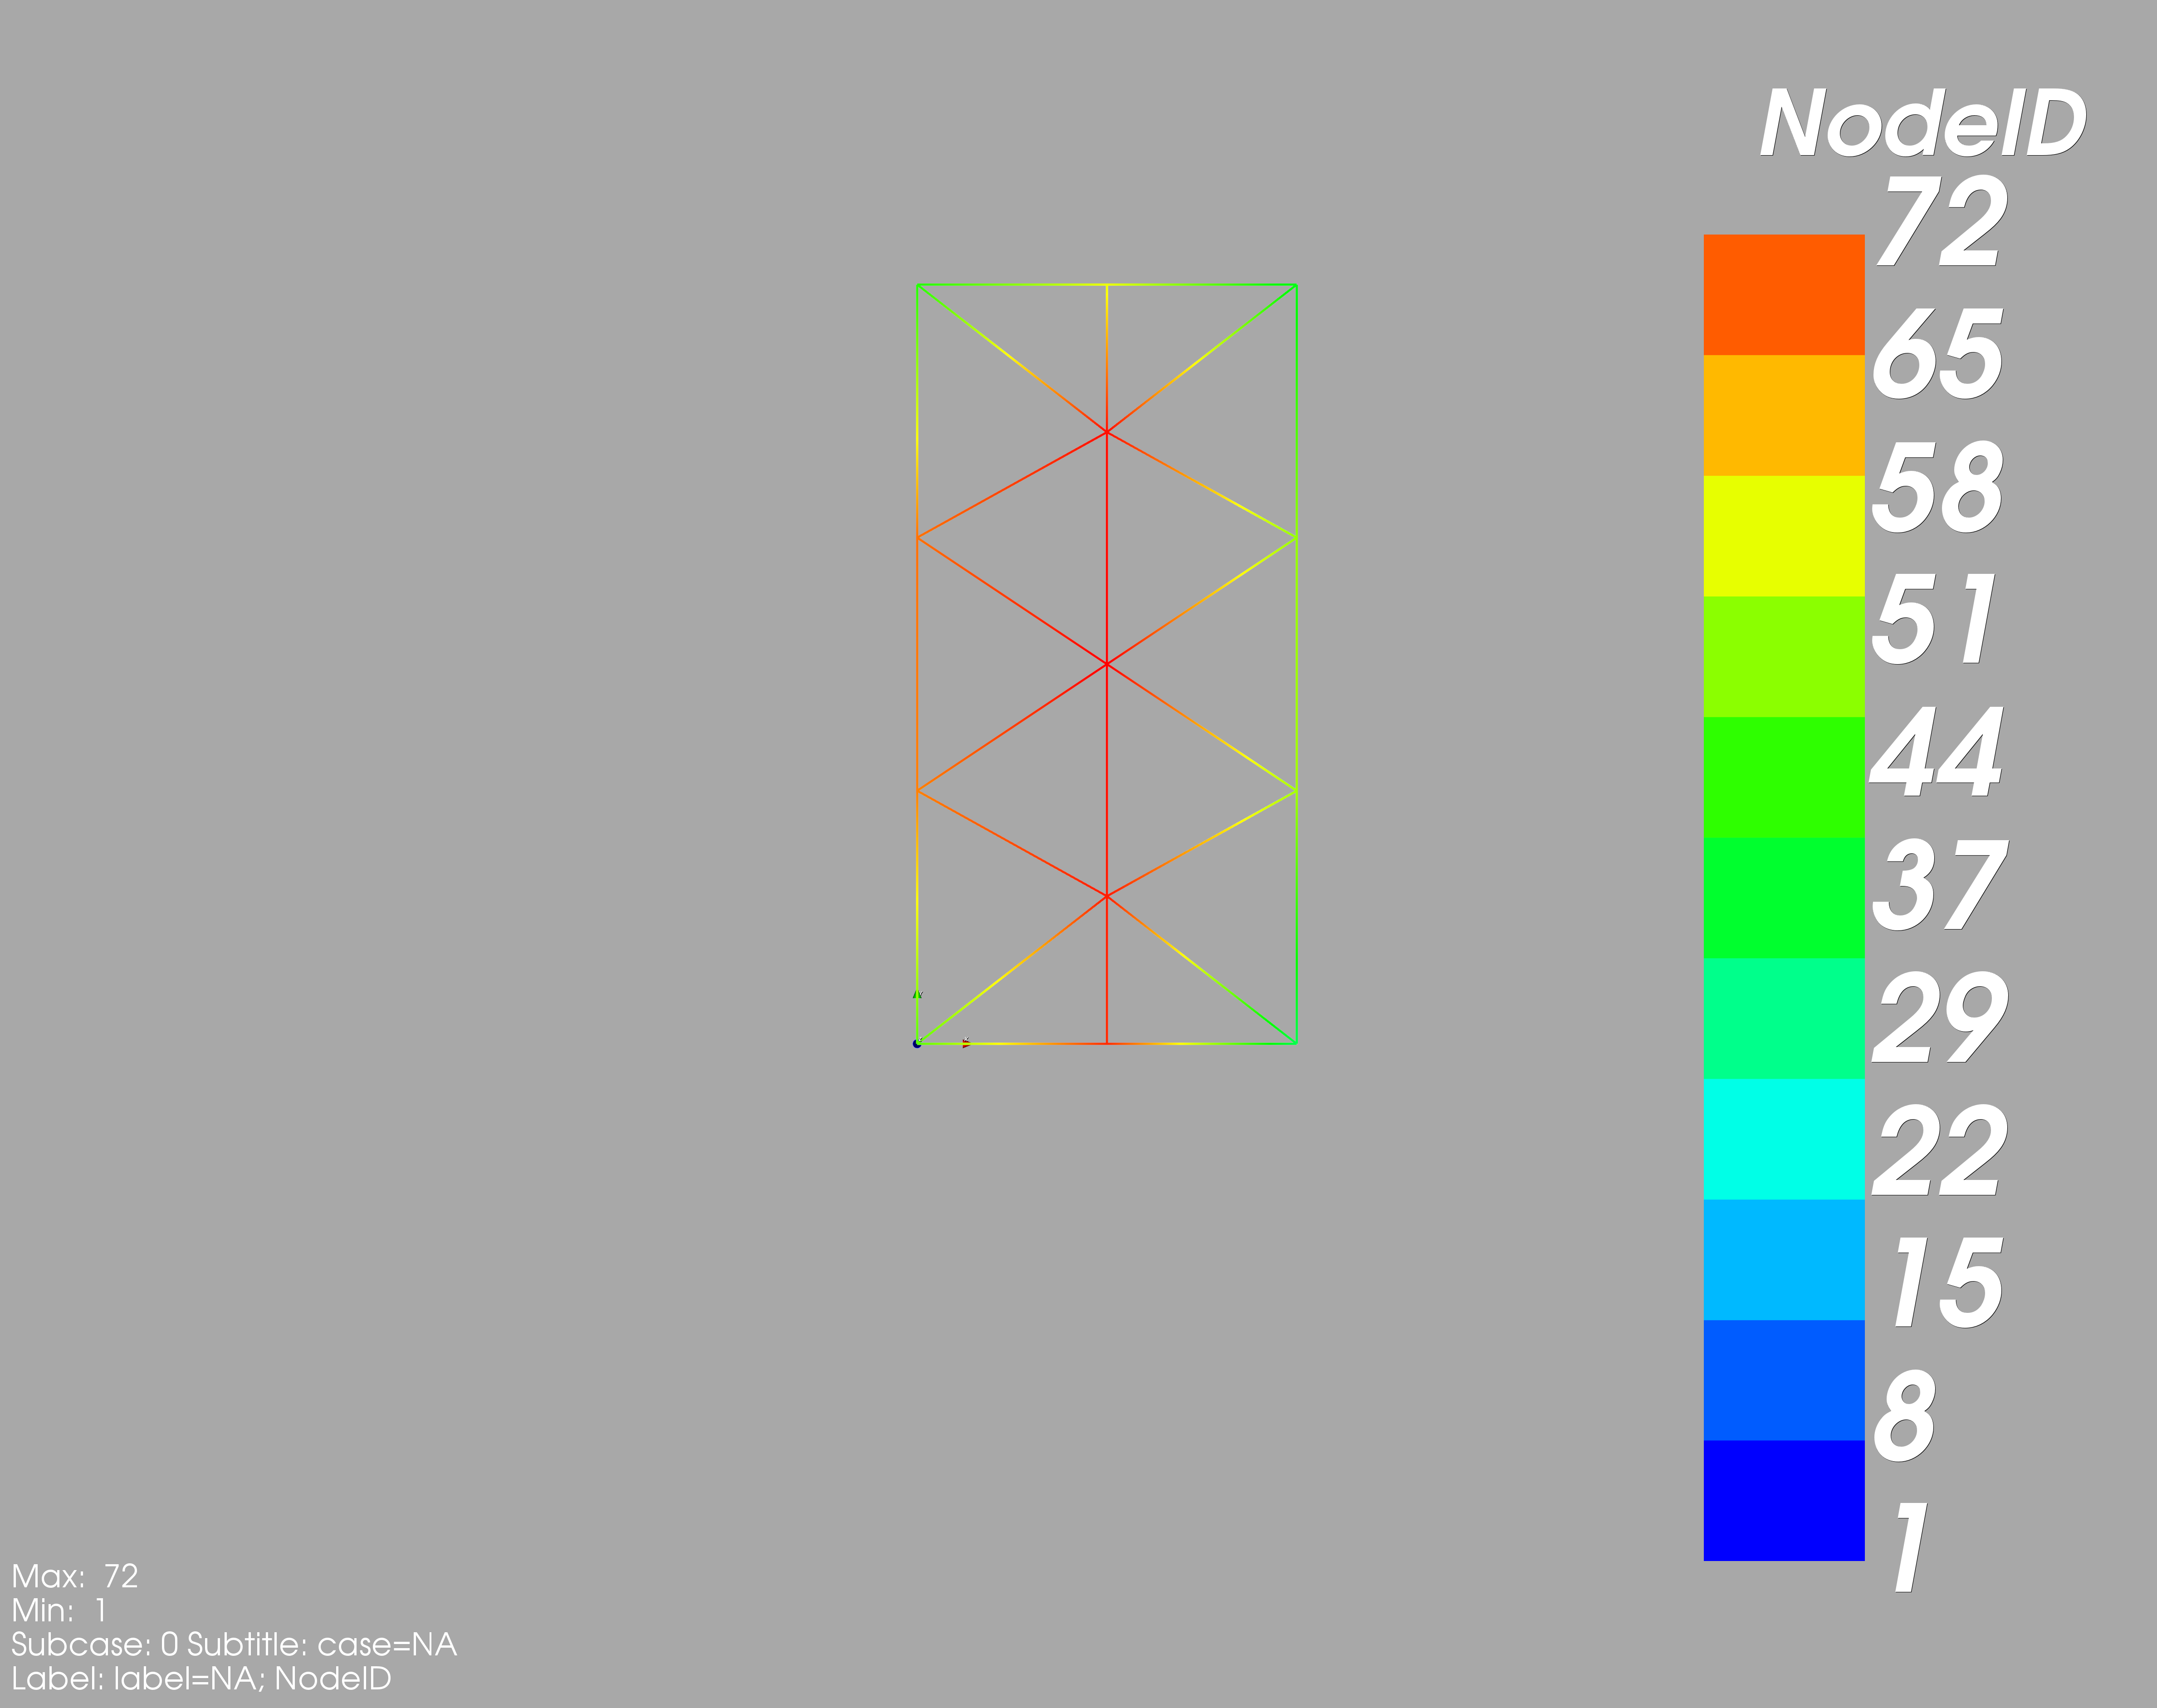

the picture is visible


In [22]:
with open('script.py', 'w') as f:
    f.write('self.on_wireframe()\n')
    picture_filename = os.path.join(os.getcwd(), 'wireframe_solid_bending.png')
    f.write("self.on_take_screenshot(%r)\n" % picture_filename)
    f.write('sys.exit()')

!pwd
!pyNastranGUI -f nastran -i {solid_bending_bdf} -o {solid_bending_op2} --postscript script.py > junk.out

# display in a popup
!wireframe_solid_bending.png

from IPython.display import Image
from IPython.display import display
assert os.path.exists('wireframe_solid_bending.png')

# display in iPython
i = Image(filename='wireframe_solid_bending.png')
display(i)
print("the picture is visible")